In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from subprocess import check_output
from tqdm import tqdm
from statistics import mean

plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 200

## Generamos los tests y los corremos y nos guardamos los tiempos

In [5]:
Ts = [250, 500, 750, 1000]
P = 20000
eg = []
ch = []
elo = []
wp = []
chd = []
chsd = []
chdr = []
for T in tqdm(Ts):
    P = 3*T
    outs=[[],[],[],[],[],[],[]]
    for k in range(2):
        lines = [f'{T} {P}']
        for _ in range(P):
            lines += [f'1 {np.random.randint(T)} 1 {np.random.randint(T)} 0']
        with open(f'analisis_tiempos/{T}.in', 'w+') as f:
            f.write('\n'.join(lines))
        
        out = check_output(['../tiempos',f'analisis_tiempos/{T}.in']).decode('UTF-8')
        out = list(filter(bool, out.split('\n')))
        
        outs[0].append(float(out[0]))
        outs[3].append(float(out[3]))
        outs[2].append(float(out[2]))
        outs[1].append(float(out[1]))
        outs[4].append(float(out[4]))
        outs[5].append(float(out[5]))
        outs[6].append(float(out[6]))
        
    eg.append(mean(outs[0]))
    ch.append(mean(outs[3]))
    elo.append(mean(outs[2]))
    wp.append(mean(outs[1]))
    chd.append(mean(outs[4]))
    chsd.append(mean(outs[5]))
    chdr.append(mean(outs[6]))
        

100%|██████████| 4/4 [00:06<00:00,  1.68s/it]


## Ploteamos los datos

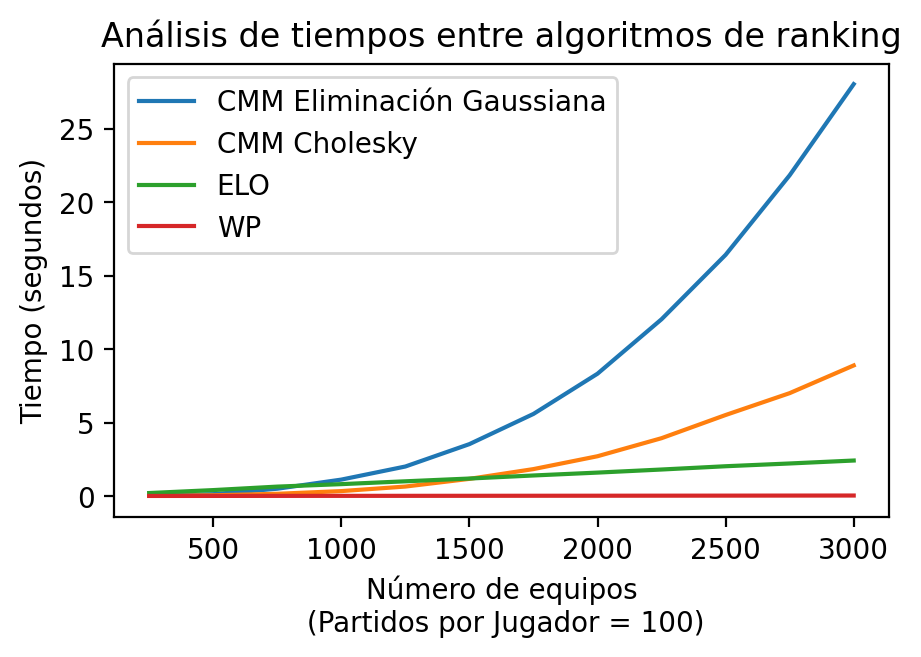

In [79]:
data = {
    'Número de equipos': Ts,
    'CMM Eliminación Gaussiana': eg,
    'CMM Cholesky': ch,
    'CMM Disperso': chd,
    'CMM Semi-disperso': chsd,
    'CMM Semi-disperso-rápido': chdr,
    'ELO': elo,
    'WP': wp,
}
df = pd.DataFrame(data)

df.plot(kind='line',x='Número de equipos',y=['CMM Eliminación Gaussiana','CMM Cholesky','ELO','WP'])
plt.xlabel('Número de equipos\n (Partidos por Jugador = 100)')
plt.ylabel('Tiempo (segundos)')
plt.title('Análisis de tiempos entre algoritmos de ranking')
plt.legend()
plt.show()

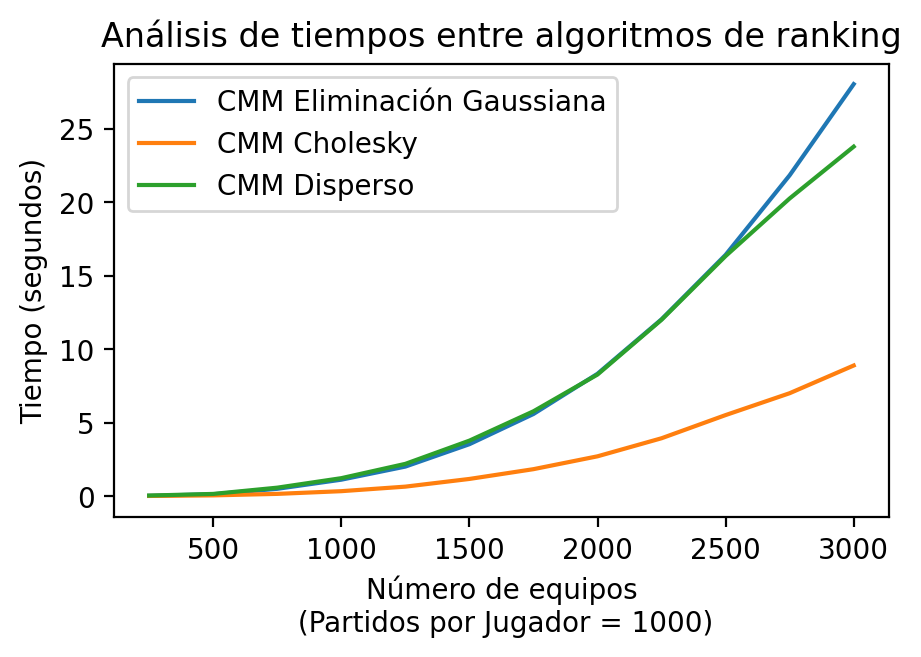

In [80]:
df.plot(kind='line',x='Número de equipos',y=['CMM Eliminación Gaussiana','CMM Cholesky',
          'CMM Disperso'])
plt.xlabel('Número de equipos\n (Partidos por Jugador = 1000)')
plt.ylabel('Tiempo (segundos)')
plt.title('Análisis de tiempos entre algoritmos de ranking')
plt.legend()
plt.show()

## Ploteamos los datos (con escala raíz cúbica)

In [82]:
df['CMM Eliminación Gaussiana'] = df['CMM Eliminación Gaussiana'].apply(lambda v : v**(1./3.))
df['CMM Cholesky'] = df['CMM Cholesky'].apply(lambda v : v**(1./3.))
df['CMM Disperso'] = df['CMM Disperso'].apply(lambda v : v**(1./3.))

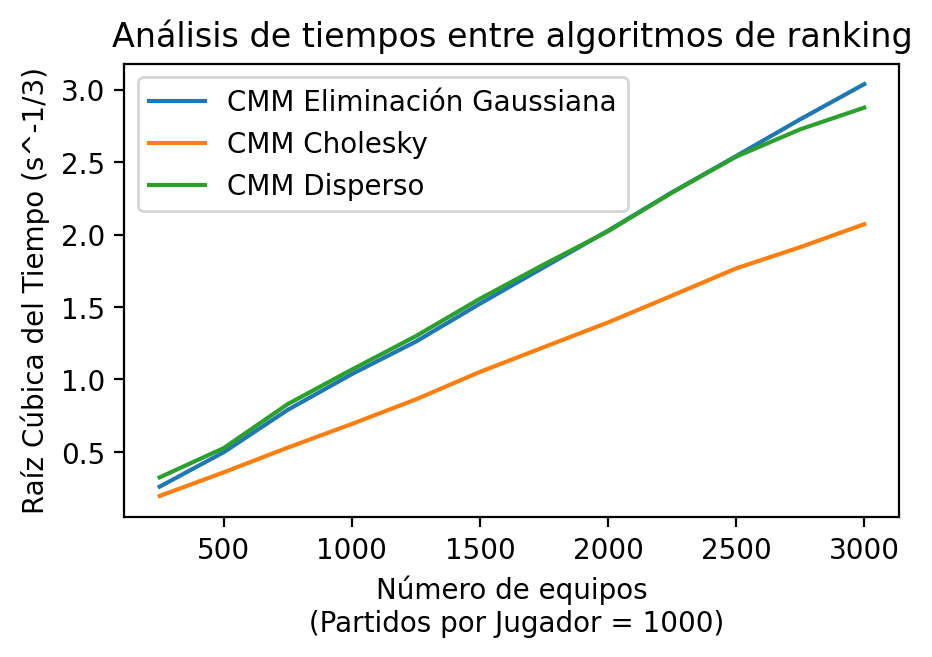

In [83]:
df.plot(kind='line',x='Número de equipos',
        y=['CMM Eliminación Gaussiana','CMM Cholesky',
          'CMM Disperso'])
plt.xlabel('Número de equipos\n (Partidos por Jugador = 1000)')
plt.ylabel('Raíz Cúbica del Tiempo (s^-1/3)')
plt.title('Análisis de tiempos entre algoritmos de ranking')
plt.legend()
plt.show()